# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings

# Setup
warnings.filterwarnings("ignore")

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Read data
data = pd.read_csv('sub_1.csv')


Examine the data using the `head` function.

In [4]:
data.head()

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [7]:
data.isna().sum()

Unnamed: 0            0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [8]:
data.shape

(1751, 13)

In [9]:
len(data)

1751

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [17]:
start = '2018-01-01 00:00:00'
end = '2018-01-01 00:29:10'
freq = 'infer'
num_periods = len(data)

index = pd.date_range(start=start, end=end, periods=num_periods)


Assign the time series index to the dataframe's index.

In [18]:
data.set_index(index, inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

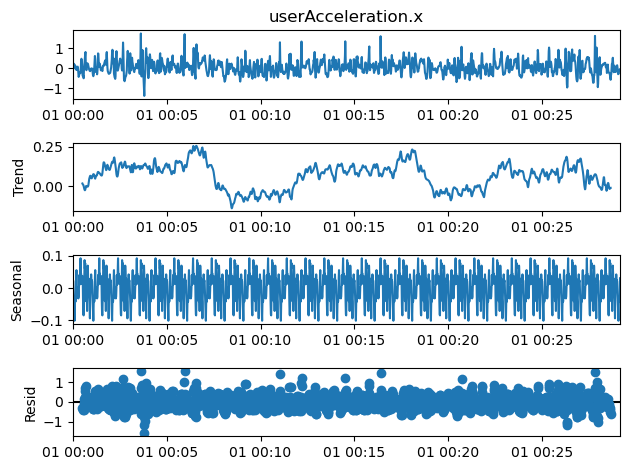

In [20]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data['userAcceleration.x'], period=60)
fig = decomposition.plot()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

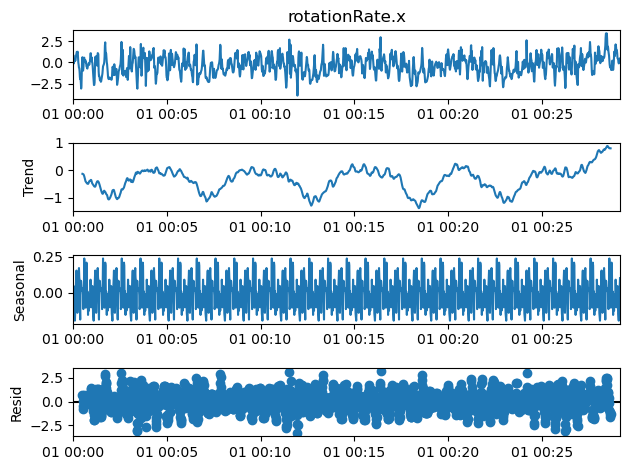

In [21]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data['rotationRate.x'], period=60)
fig = decomposition.plot()


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`.

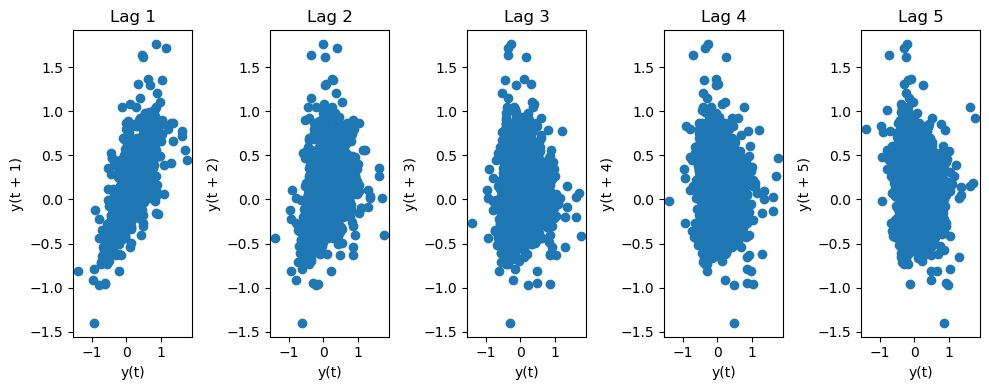

In [23]:
# create multiple lag plots
lags = range(1,6)#[1, 6, 12]
fig, axs = plt.subplots(1, len(lags), figsize=(10, 4))

for i, lag in enumerate(lags):
    pd.plotting.lag_plot(data['userAcceleration.x'], lag=lag, ax=axs[i])
    axs[i].set_title(f'Lag {lag}')
    
plt.tight_layout()
plt.show()

Create a lag plot for `rotationRate.x`

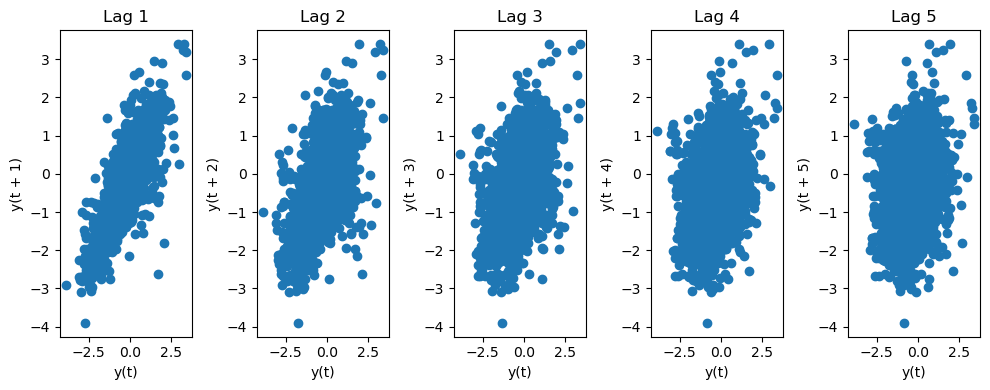

In [24]:
# create multiple lag plots
lags = range(1,6)#[1, 6, 12]
fig, axs = plt.subplots(1, len(lags), figsize=(10, 4))

for i, lag in enumerate(lags):
    pd.plotting.lag_plot(data['rotationRate.x'], lag=lag, ax=axs[i])
    axs[i].set_title(f'Lag {lag}')
    
plt.tight_layout()
plt.show()

What are your conclusions from both visualizations?

```Comments:``` Autocorrelation in time series means that the series is linearly related to a lagged version of itself. For features 'rotationRate.x' and 'userAcceleration.x', the observations at time *t* have a positive linear correlation with the observations at time *t+1*. One of the assumptions of regression analysis is that the data has no autocorrelation. If we try to do a regression analysis on data with autocorrelation, then our analysis will be misleading.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [25]:
# Ho: userAcceleration.x is not stationary
# Ha: userAcceleration.x is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['userAcceleration.x'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

'''
The null hypothesis for the ADF test is that the data is non-stationary, so if the
 p-value is below a significance level (e.g., 0.05), we can reject the null hypothesis and conclude
  that the data is stationary.'''


ADF Statistic: -17.95799408616974
p-value: 2.823439483037563e-30
Critical Values:
	1%: -3.434100824760071
	5%: -2.863196780129223
	10%: -2.5676520210882936


In [27]:
# Perform the ADF test
result = sm.tsa.stattools.adfuller(data['userAcceleration.x'])

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary.')

ADF Test Statistic: -17.95799408616974
p-value: 2.823439483037563e-30
The data is stationary.


In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['rotationRate.x'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -5.269860625086421
p-value: 6.320230335912189e-06
Critical Values:
	1%: -3.4341465551936534
	5%: -2.863216966926812
	10%: -2.567662770090317


In [28]:
# Perform the ADF test
result = sm.tsa.stattools.adfuller(data['rotationRate.x'])

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary.')

ADF Test Statistic: -5.269860625086421
p-value: 6.320230335912189e-06
The data is stationary.


What are your conclusions from this test?

```Comments:``` ARMA models work on the assumption that the time series is stationary. Stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. In both cases, we can reject the null hypothesis that the time series is not stationary, so we can create an ARMA model.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [34]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA of order (p,q)
# p: order of the autoregressive model (AR).
# q: order of the moving average model (MA).

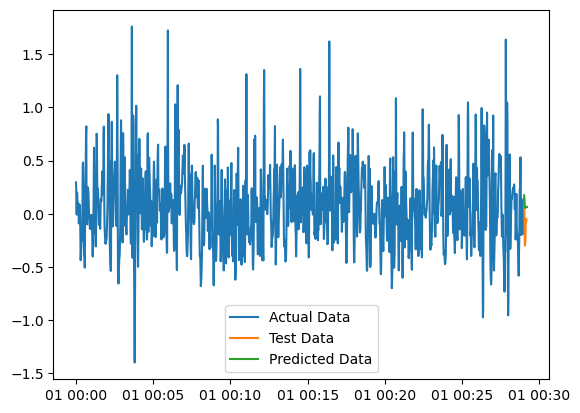

In [37]:
# Split the data into training and testing sets
train_data = data['userAcceleration.x'][:-10]
test_data = data['userAcceleration.x'][-10:]

# Fit an ARMA(2,2) model on the training data
model = ARIMA(train_data, order=(2,0, 1)).fit()

# Predict the next 12 months of passenger traffic using the fitted model
pred = model.predict(start=len(train_data), end=len(train_data)+11)

# Plot the actual and predicted passenger traffic for the test data
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

In [35]:

# Split the data into training and testing sets
train_data = data['userAcceleration.x'][:-10]
test_data = data['userAcceleration.x'][-10:]

# Create the ARMA model
model = ARIMA(train_data, order=(2,0, 1))

# Fit the model to the training data
result = model.fit()

# Make predictions on the test data
predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Print the model summary
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Tue, 07 Mar 2023   AIC                           -736.803
Time:                        22:00:59   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.0

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [38]:
from statsmodels.tools.eval_measures import rmse

In [39]:
from statsmodels.tools.eval_measures import rmse

# Compute the RMSE for the last 10 rows of the data
rmse_val = rmse(predictions, test_data)

print(f"RMSE: {rmse_val:.2f}")


RMSE: 0.23


```Comments:``` 
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data, so how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. We can say that the deviation from the true prediction is +/- 0.22.